### 2. Wykresy P(ruina gracza A) od kapitału początkowego a
Proszę zasymulować proces ruiny gracza z łącznymi kapitałami początkowymi a + b = 100 i p = 1/2.

Z symulacji dla różnych wartości kapitału początkowego a proszę narysować wykresy zależności prawdopodobieństwa ruiny gracza P(ruina A) od a.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def simulate_ruin(capital_a: int, capital_b: int, p: float) -> tuple[int, int]:
    """
    p - probability of player A taking 1$ from player B
    """
    while capital_a != 0 and capital_b != 0:
        if np.random.rand() < p:
            capital_a += 1
            capital_b -= 1
        else:
            capital_a -= 1
            capital_b += 1

    return capital_a, capital_b

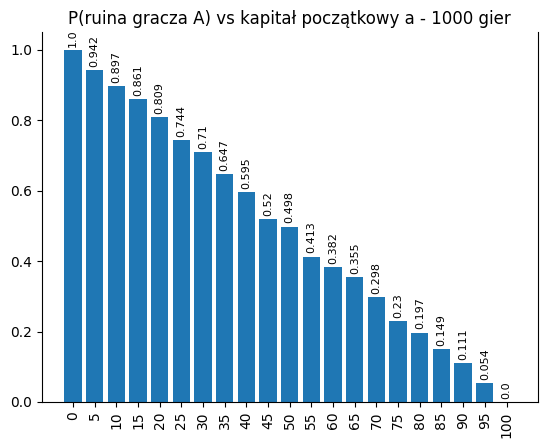

In [5]:
n_games = 1000
total_capital = 100
p = 0.5

string_capitals = [f"{p}" for p in range(0, 101, 5)]
capitals = list(map(int, string_capitals))
ruin_a_counts = np.zeros(len(capitals))

for i, capital_a in enumerate(capitals):
    capital_b = total_capital - capital_a
    for _ in range(n_games):
        result_a, result_b = simulate_ruin(capital_a, capital_b, p)
        if result_a == 0:
            ruin_a_counts[i] += 1

ruin_a_probs = ruin_a_counts/n_games

plt.bar(string_capitals, ruin_a_probs)
plt.xticks(rotation='vertical')
plt.gca().spines['top'].set_visible(False) # remove the top border
plt.title(f"P(ruina gracza A) vs kapitał początkowy a - {n_games} gier")
for index, value in enumerate(ruin_a_probs):
    plt.text(index, value + 0.015, 
             value, 
             ha='center', 
             fontsize=8, 
             rotation='vertical')